# Linear Regression using Least Squares

## What is linear regression?
In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Essentially, how do(es) our input(s), $x$ effect our output $y$? We use linear regression to create a line of best fit, allowing us to make predictions about missing data. In this example we will focus on using only one input variable, also known as simple linear regression.

Let's say we have a scatter plot that looks something like this:

In [ ]:
# Making imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing Input data
data = pd.read_csv('data.csv')
X = data.iloc[:, 0] # get data from all rows in column 0
Y = data.iloc[:, 1] # get data from all rows in column 1

plt.scatter(X, Y)
plt.show()

Looking at the data, one can see a clear linear relationship between our input $x$ and output $y$. Using this knowledge, let's try to make a prediction for when our input $x=30$. A reasonable estimate would be somewhere around 45.

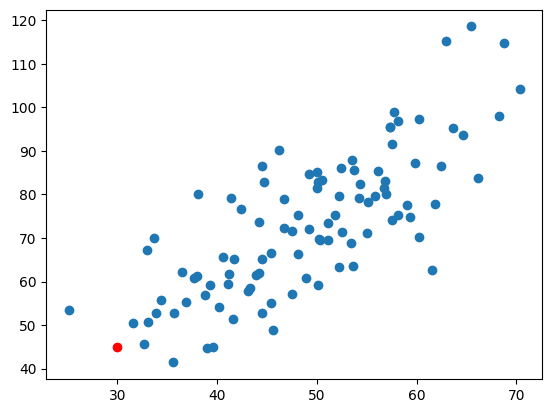

In [2]:
plt.scatter(X, Y)
plt.scatter(30, 45, c='red')
plt.show()

Now let's do the same thing, but this time for all values of $x$, keeping in mind that our results must fall on a straight line. As such we might as well draw a line representing our guess through our data.

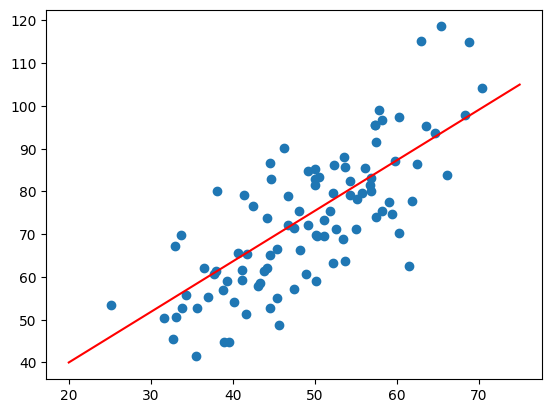

In [3]:
plt.scatter(X,Y)
plt.plot([20,75], [40,105], c='red')
plt.show()

That's a good estimate, but is it the best estimate? Further, how do we even find the best estimate?

## The Loss Function
A good way to start is by finding out how wrong our guess is. One way to do this is by finding the distance between our actual and predicted values. This can be represented as $y_i - c_i$ where $y$ is the set of our actual values and $c$ is the set of our predicted values. Currently, this difference can be both positive or negative as we could be making an over or under-prediction. However, we don't care about that, and only want to know how wrong we are, so let's square the value to make sure it's positive. Finally, we have to do this for every point in our data set and add up the results. This gives us our loss function
$$L = \sum_{i=1}^{n}{(y_i - c_i)^2}$$
where n is the number of points in our set. Now that we can numerically quantify our error, it is important to know that it will never* be zero as our data will never* be perfectly linear (if it is you don't need to be using linear regression). Instead, the best we can do is to try and make this error as small as possible. As $c_i$ is just a point on our line, let's rewrite $c_i$ as $mx_i + b$ where $m$ is our coefficient and $b$ is the y-intercept. This leaves us with
$$L(m, b) = \sum_{i=1}^{n}{(y_i - (mx_i + b))^2}$$
For fun, let's calculate the error of our prediction in the previous graph

In [4]:
m = (105-40)/(75-20) # the slope of our line, using previous prediction
b = 40 - 20*m # y-value of a point on our line minus the x-value of that point time the slope

error = 0
for xi, yi in data.to_numpy():
    error += (yi - (m*xi+b))**2

print(f'The calculated error is: {error}.')

The calculated error is: 10901.069048010442.


## Minimizing the Error
Here are the formulas for the best value of $m$ and $b$ where $\bar{x}$ and $\bar{y}$ are the average $x$ and $y$ values.
$$m = \frac{\sum_{i=1}^{n}{(x_i - \bar{x})(y_i - \bar{y})}}{\sum_{i=1}^{n}{(x_i - \bar{x})^2}}$$
$$b = \bar{y} - m\bar{x}$$
If you haven't taken calculus and/or don't care about *why* these formulas work, feel free to skip to the next section. Otherwise, it's time for some partial derivatives! We start by finding the partial derivative with respect to $b$ by treating $m$ as a constant and setting the derivative equal to 0 in order to find the minimum of the loss function.
$$L(m, b) = \sum_{i=1}^{n}{(y_i - (mx_i + b))^2}$$
Remove the parentheses
$$\sum_{i=1}^{n}{(y_i - mx_i - b)^2}$$
Power rule the square and multiply by -1 because of the chain rule
$$\frac{\partial b}{\partial L} = -2\sum_{i=1}^{n}{(y_i - mx_i - b)}$$
Set it equal to 0
$$0 = -2\sum_{i=1}^{n}{(y_i - mx_i - b)}$$
Divide both sides by -2
$$0 = \sum_{i=1}^{n}{(y_i - mx_i - b)}$$
Split up the summation
$$0 = \sum_{i=1}^{n}{y_i}-\sum_{i=1}^{n}{mx_i}-\sum_{i=1}^{n}{b}$$
Move $b$ to the other side
$$\sum_{i=1}^{n}{b} = \sum_{i=1}^{n}{y_i}-\sum_{i=1}^{n}{mx_i}$$
Sum of a number is just multiplying the number
$$nb = \sum_{i=1}^{n}{y_i}-\sum_{i=1}^{n}{mx_i}$$
Divide both sides by $n$
$$b = \frac{\sum_{i=1}^{n}{y_i}}{n}-\frac{\sum_{i=1}^{n}{mx_i}}{n}$$
Move $m$ out of the summation
$$b = \frac{\sum_{i=1}^{n}{y_i}}{n}-\frac{m\sum_{i=1}^{n}{x_i}}{n}$$
The sum of a list divided by the number of items is the average
$$b = \bar{y}-m\bar{x}$$

Now substitute $b$ in the original formula and derive with respect to $m$
$$L(m) = \sum_{i=1}^{n}{(y_i - (mx_i + (\bar{y}-m\bar{x})))^2}$$
Remove the parentheses
$$\sum_{i=1}^{n}{(y_i - mx_i - \bar{y} + m\bar{x})^2}$$
Factor out $m$
$$\sum_{i=1}^{n}{(y_i - \bar{y} + m(\bar{x} - x_i))^2}$$
Power rule the square and chain rule the $(\bar{x} - x_i)$
$$\frac{\partial m}{\partial L} = 2\sum_{i=1}^{n}{(\bar{x} - x_i)(y_i - \bar{y} + m(\bar{x} - x_i))}$$
Set equal to 0
$$0 = 2\sum_{i=1}^{n}{(\bar{x} - x_i)(y_i - \bar{y} + m(\bar{x} - x_i))}$$
Divide both sides by 2
$$0 = \sum_{i=1}^{n}{(\bar{x} - x_i)(y_i - \bar{y} + m(\bar{x} - x_i))}$$
Multiply out the first set of parentheses
$$0 = \sum_{i=1}^{n}{(\bar{x} - x_i)(y_i - \bar{y}) + m(\bar{x} - x_i)^2}$$
Split the summation
$$0 = \sum_{i=1}^{n}{(\bar{x} - x_i)(y_i - \bar{y})} + \sum_{i=1}^{n}{m(\bar{x} - x_i)^2}$$
Move the first sum to the other side
$$-\sum_{i=1}^{n}{(\bar{x} - x_i)(y_i - \bar{y})} = \sum_{i=1}^{n}{m(\bar{x} - x_i)^2}$$
Move the negative sign inside summation by flipping subtraction
$$\sum_{i=1}^{n}{(x_i - \bar{x})(y_i - \bar{y})} = \sum_{i=1}^{n}{m(\bar{x} - x_i)^2}$$
Move out the $m$
$$\sum_{i=1}^{n}{(x_i - \bar{x})(y_i - \bar{y})} = m\sum_{i=1}^{n}{(\bar{x} - x_i)^2}$$
Isolate $m$
$$m = \frac{\sum_{i=1}^{n}{(x_i - \bar{x})(y_i - \bar{y})}}{\sum_{i=1}^{n}{(\bar{x} - x_i)^2}}$$
Congratulations, you now know the slope and y-intercept of your line. All that's left is to plug in our numbers. Let's see what our error is now.

In [5]:
X_avg = np.average(X)
Y_avg = np.average(Y)

numerator = 0
denominator = 0
for xi, yi in data.to_numpy():
    numerator += (xi - X_avg)*(yi - Y_avg)
    denominator += (xi - X_avg)**2

m = numerator/denominator
b = Y_avg - m*X_avg

error = 0
for xi, yi in data.to_numpy():
    error += (yi - (m*xi+b))**2
print(error)

10639.5732639414


As you can see, our previous guess was pretty good, but not perfect

## Putting it All Together
Now that we know the theory, let's put it to use by calculating an actual line fo best fit for our data. As a quick reminder, here are our formulas again:
$$m = \frac{\sum_{i=1}^{n}{(x_i - \bar{x})(y_i - \bar{y})}}{\sum_{i=1}^{n}{(x_i - \bar{x})^2}}$$
$$b = \bar{y} - m\bar{x}$$

In [6]:
X_avg = np.average(X)
Y_avg = np.average(Y)

numerator = 0
denominator = 0
for xi, yi in data.to_numpy():
    numerator += (xi - X_avg)*(yi - Y_avg)
    denominator += (xi - X_avg)**2

m = numerator/denominator
b = Y_avg - m*X_avg

print(m, b)

1.2873573700109315 9.90860619032653


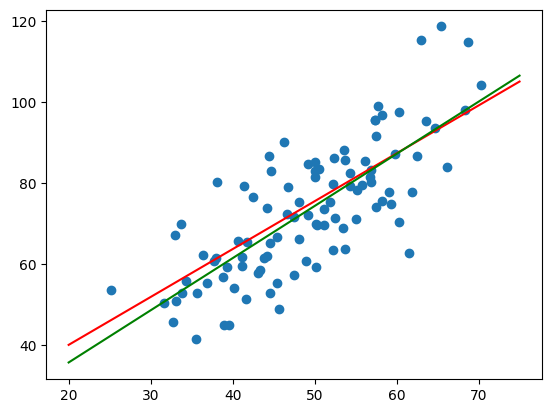

In [7]:
plt.scatter(X,Y)
plt.plot([20,75], [40,105], c='red') # our original prediction
plt.plot([20,75], [m*20+b,m*75+b], c='green') # the line of best fit
plt.show()

And there we have it, our line of best fit.